In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset_names = [
         'adult',
         'Amazon_employee_access',
         'bank-marketing',
         'Click_prediction_small',
         'credit-g',
         'eeg-eye-state',
         'electricity',
         #'kc1',
         ]

In [7]:
auto_ml_names = [
    'automl_alex',
    'tpot',
    'h2o',
    'autosklearn',
    'autogluon',
    'Auto_ml',  
    'lightgbm-default',
    #'lightgbm-opt',
    'catboost-default',

    ]

In [8]:
METRIC = 'AUC'
metrics = ['AUC', 
#'log_loss', 
#'Accuracy'
]

adult
                      AUC
autosklearn       0.91188
tpot              0.91260
h2o               0.91428
lightgbm-default  0.91444
Auto_ml           0.91466
autogluon         0.91484
catboost-default  0.91498
automl_alex       0.91638
---------------------------------------------------------------------------
                       AUC
h2o               0.002050
tpot              0.002619
automl_alex       0.002929
catboost-default  0.002952
autosklearn       0.003106
autogluon         0.003222
Auto_ml           0.003276
lightgbm-default  0.003686
---------------------------------------------------------------------------
Amazon_employee_access
                      AUC
autosklearn       0.50000
tpot              0.78954
Auto_ml           0.82860
lightgbm-default  0.84626
catboost-default  0.84666
h2o               0.85510
autogluon         0.85770
automl_alex       0.86258
---------------------------------------------------------------------------
                       AUC
autos

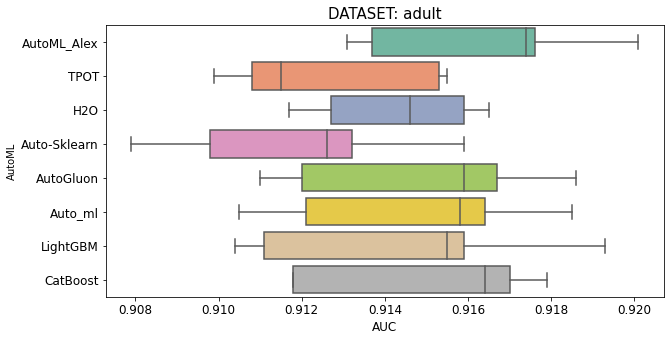

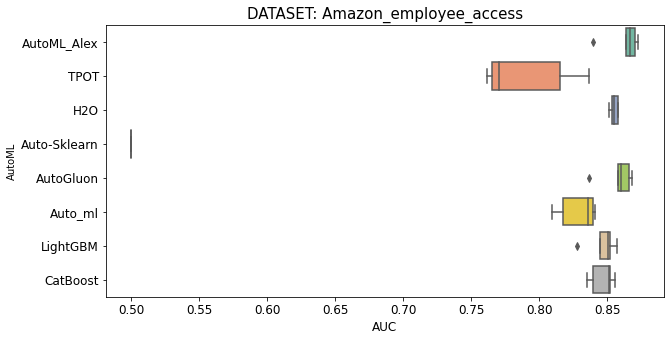

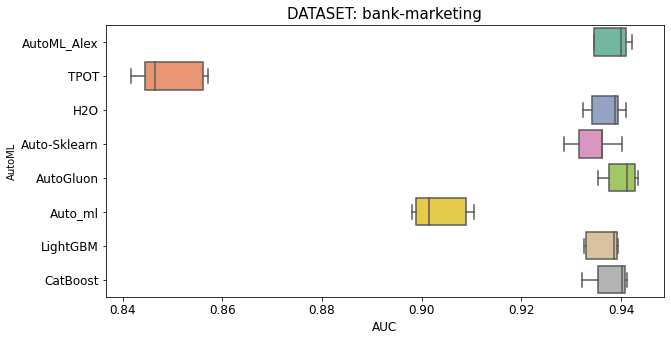

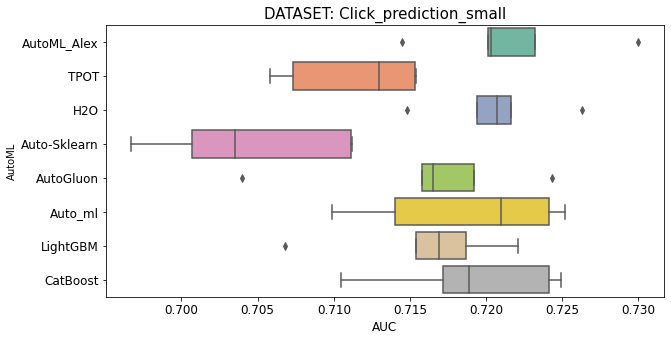

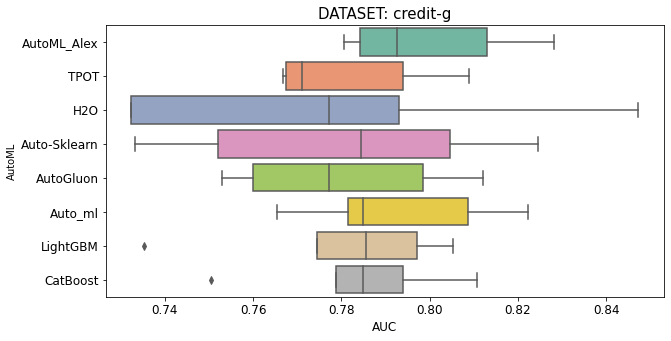

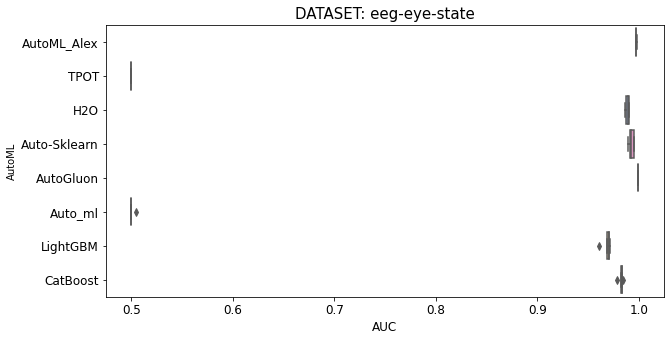

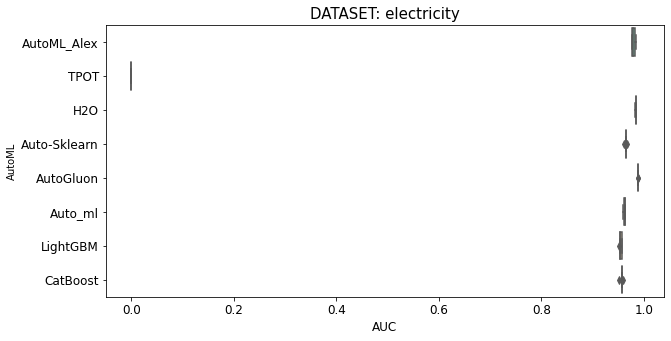

In [9]:
total_place = pd.DataFrame()
for metric in metrics:
    bench_result = {}
    for name in auto_ml_names:
        bench_result[name] = 0
    for dataset_name in dataset_names:
        print('='*75)
        print(dataset_name)
        bench_auc = []
        bench_auc_std = []
        all_df = pd.DataFrame()
        for AUTOML in auto_ml_names:
            result = pd.read_csv(f'./frameworks/{AUTOML}/result/{dataset_name}_{AUTOML}_metrics.csv')
            bench_auc.append(result[metric].mean())
            bench_auc_std.append(result[metric].std())
            #tmp_df = result[metric]
            #tmp_df.columns = [AUTOML]
            all_df[AUTOML] = result[metric]
        res = pd.DataFrame(bench_auc, columns=[METRIC,], index=auto_ml_names).sort_values(by=[METRIC])
        print(res)
        print('-'*75)
        res_std = pd.DataFrame(bench_auc_std, columns=[METRIC,], index=auto_ml_names).sort_values(by=[METRIC])
        print(res_std)
        print('-'*75)
        #save plot
        all_df.columns = [
            'AutoML_Alex',
             'TPOT', 
        'H2O', 
        'Auto-Sklearn',
        'AutoGluon',
        'Auto_ml', 
        'LightGBM', 
        'CatBoost',
        ]
        plt.figure(figsize=(10,5),)
        sns.boxplot(data=all_df, orient="h", palette="Set2",).set_title('DATASET: '+dataset_name, size = 15,)
        plt.tick_params(labelsize=12)
        plt.ylabel("AutoML", size=10,)
        plt.xlabel("AUC", size=12)
        plt.savefig(f'{dataset_name}.png')
        #plt.show()

        for i, name in enumerate(res.index):
            bench_result[res.index[i]] += i+1
            #total_place.append(bench_result)
            bench = pd.io.json.json_normalize(bench_result,).T
            bench.columns = [f'{metric} place']
    total_place = pd.concat([total_place, bench], axis=1, sort=False)
            #bench = bench.sort_values(by=f'{metric} place', ascending=False)
            #bench.to_csv(f'{metric}_place.csv',)
#result.head(5)

In [10]:
total_score = total_place.sort_values(by='AUC place', ascending=False)
total_score

,AUC place
automl_alex,52
autogluon,44
catboost-default,37
h2o,34
Auto_ml,28
lightgbm-default,23
autosklearn,20
tpot,14


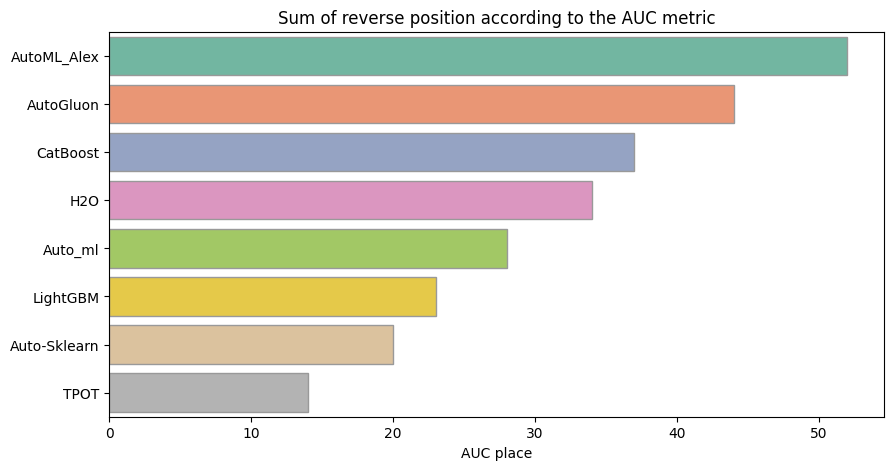

In [11]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ['AutoML_Alex', 'AutoGluon', 'CatBoost', 'H2O','Auto_ml', 'LightGBM',
'Auto-Sklearn', 'TPOT',
]
#y_pos = np.arange(len(objects))
performance = total_score['AUC place']

#plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.figure(figsize=(10,5),)
ax = sns.barplot(y=objects, x=performance, orient="h", palette="Set2", edgecolor=".6",)
#plt.tick_params(labelsize=12)
#plt.yticks(y_pos, objects)
#plt.xlabel('Usage')
plt.title('Sum of reverse position according to the AUC metric')
plt.savefig('Total_SUM.png')
plt.show()